# Fetch Rewards Coding Exercise
# Text Similiarity
## Carolyn Stienen

In [1]:
import textsimilarity as ts
import matplotlib.pyplot as plt
import numpy as np

The similarity between samples 1 and 1 is: 1.000000
The similarity between samples 1 and 2 is: 0.635338
The similarity between samples 1 and 3 is: 0.194245
The similarity between samples 2 and 3 is: 0.190972


In [2]:
sample1_txt = open("sample1.txt").read()
sample2_txt = open("sample2.txt").read()
sample3_txt = open("sample3.txt").read()

To start off I tried something basic: compare all the words and calculate how many were the same out of the total.

In [3]:
similarity_score = ts.calculate_similarity(sample1_txt,sample1_txt)
print("The similarity between samples 1 and 1 is: %f" % similarity_score)

similarity_score = ts.calculate_similarity(sample1_txt,sample2_txt)
print("The similarity between samples 1 and 2 is: %f" % similarity_score)

similarity_score = ts.calculate_similarity(sample1_txt,sample3_txt)
print("The similarity between samples 1 and 3 is: %f" % similarity_score)

similarity_score = ts.calculate_similarity(sample2_txt,sample3_txt)
print("The similarity between samples 2 and 3 is: %f" % similarity_score)

The similarity between samples 1 and 1 is: 1.000000
The similarity between samples 1 and 2 is: 0.827068
The similarity between samples 1 and 3 is: 0.417266
The similarity between samples 2 and 3 is: 0.409722


I compared sample text 1 with itself to make sure that it was returning 1.0.

All the other scores are within the range of 0 and 1, which is good, but I'd like to see what adding more metrics to the algorithm does to the scores.

In [5]:
#Plot 1: No position, no punctuation
#Plot 2: Positioning, no punctuation
#Plot 3: Positioning and punctuation
#Plot 4: Positioning, punctuation, and stripping filler words

s1 = ts.calculate_similarity(sample1_txt,sample2_txt)
s2 = ts.calculate_similarity(sample1_txt,sample3_txt)

plot1 = [s1,s2]

s1 = ts.calculate_similarity(sample1_txt,sample2_txt,use_position=True)
s2 = ts.calculate_similarity(sample1_txt,sample3_txt,use_position=True)

plot2 = [s1,s2]

s1 = ts.calculate_similarity(sample1_txt,sample2_txt,use_position=True,use_punctuation=True)
s2 = ts.calculate_similarity(sample1_txt,sample3_txt,use_position=True,use_punctuation=True)

plot3 = [s1,s2]

s1 = ts.calculate_similarity(sample1_txt,sample2_txt,use_position=True,use_punctuation=True,remove_filler_words=True)
s2 = ts.calculate_similarity(sample1_txt,sample3_txt,use_position=True,use_punctuation=True,remove_filler_words=True)
                             
plot4 = [s1,s2]

y_axis = plot1 + plot2 + plot3 + plot4

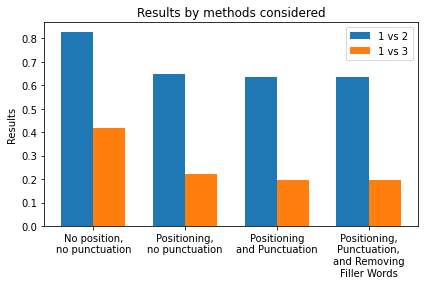

In [7]:
labels = ['No position,\nno punctuation', 'Positioning,\nno punctuation', 'Positioning\nand Punctuation',
          'Positioning,\nPunctuation,\nand Removing\nFiller Words']
onevtwo = [y_axis[0], y_axis[2], y_axis[4], y_axis[6]]
onevthree = [y_axis[1], y_axis[3], y_axis[5], y_axis[7]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, onevtwo, width, label='1 vs 2')
rects2 = ax.bar(x + width/2, onevthree, width, label='1 vs 3')

ax.set_ylabel('Results')
ax.set_title('Results by methods considered')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
fig.subplots_adjust(bottom=0.2)

plt.show()